In [1]:
from pathlib import Path 
import sys
import ProbabilisticParcellation.util as ut
import ProbabilisticParcellation.individ_group as ig
import ProbabilisticParcellation.plot as ppp
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np
import scipy.stats as ss



## Plot and save individual parcellations
See individual_sym_asym.ipynb


## Plot inidividual variability
See individual_variability.ipynb


## Plot probability maps

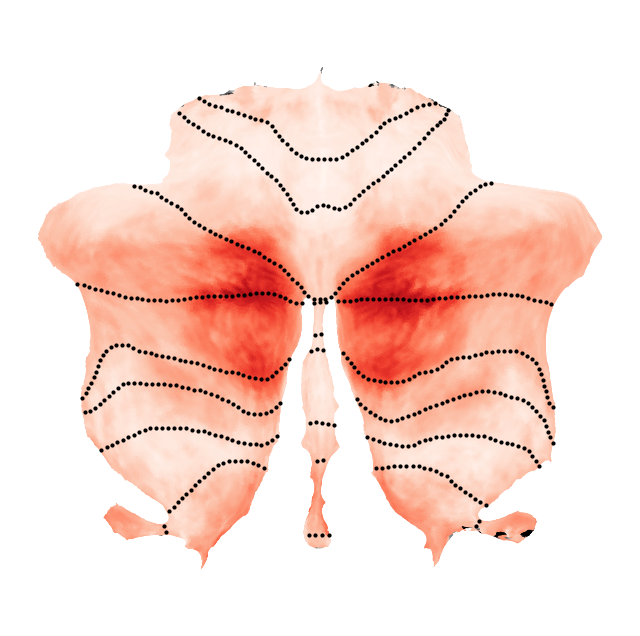

In [2]:
plt.figure(figsize=(8, 8))
ppp.plot_parcel_prob('S1','NettekovenSym32',space='MNISymC2',backgroundcolor='w',bordercolor='k')
plt.savefig(ut.figure_dir + 'Prob_S1.png',bbox_inches='tight')

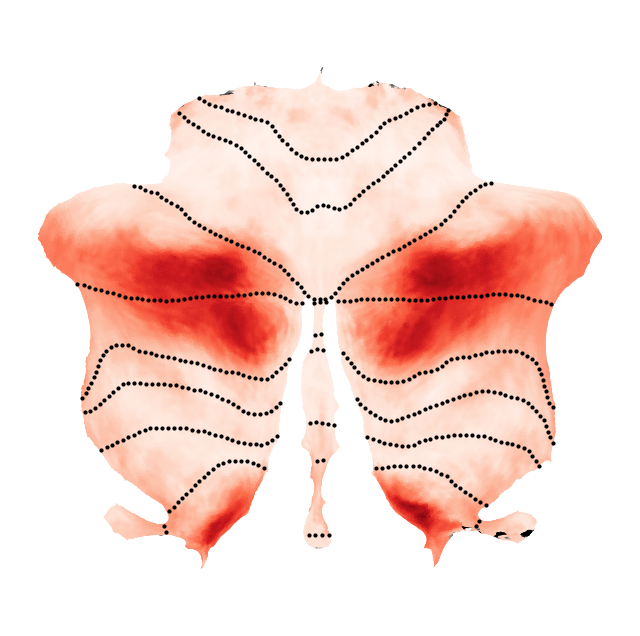

In [3]:
plt.figure(figsize=(8, 8))
ppp.plot_parcel_prob('S2','NettekovenSym32',space='MNISymC2',backgroundcolor='w',bordercolor='k')
plt.savefig(ut.figure_dir + 'Prob_S2.png',bbox_inches='tight')

## Individual vs. group analysis

In [4]:
# To produce the individual-group evaluation results:
mname = 'Models_03/NettekovenSym32_space-MNISymC2'
fname = ut.model_dir+ f'/Models/Evaluation_03/indivgroup_{mname.split("/")[1].split("_space")[0]}.tsv'
reproduce_result = False

if reproduce_result:
    info,model = ut.load_batch_best(mname)
    Uhat_data,Uhat_complete,Uhat_group = ig.get_individ_group_mdtb(model,atlas='MNISymC2')
    D = ig.evaluate_dcbc(Uhat_data,Uhat_complete,Uhat_group,atlas='MNISymC2')
    # Save as a tsv file
    D.to_csv(fname,sep='\t', index=False)
else:
    D = pd.read_csv(fname, sep='\t')

### Load results and plot Figure

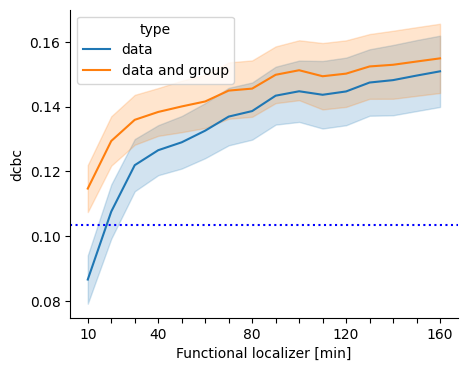

In [5]:
ig.plot_eval('indivgroup_NettekovenSym32.tsv')
plt.savefig(ut.figure_dir + 'individgroup_dcbc_NettekovenSym32.pdf',bbox_inches='tight')

### Do reported stats
How much individual data do we need to be (with data alone) better than the group atlas?

In [6]:
D = pd.read_csv(ut.model_dir + '/Models/Evaluation_03/indivgroup_NettekovenSym32.tsv',sep='\t')
T = pd.pivot_table(D[(D.runs==0) | (D.runs==4)],index='subject',columns='type',values='dcbc')
tres = ss.ttest_rel(T['data'],T['group'])
print(f'40 min data vs. group t(23)={tres.statistic:.3f}, p = {tres.pvalue:.4f}')


40 min data vs. group t(23)=2.981, p = 0.0067


In [8]:
# 20 min combined vs. data / group (note combined vs. group not quite significant for 10min)
T = pd.pivot_table(D[(D.runs==0) | (D.runs==2)],index='subject',columns='type',values='dcbc')
tres = ss.ttest_rel(T['data and group'],T['data'])
print(f'20 min combined vs. data t(23)={tres.statistic:.3f}, p = {tres.pvalue}')
tres = ss.ttest_rel(T['data and group'],T['group'])
print(f'20 min combined vs. group t(23)={tres.statistic:.3f}, p = {tres.pvalue:.4f}')

20 min combined vs. data t(23)=11.468, p = 5.433631836442057e-11
20 min combined vs. group t(23)=3.395, p = 0.0025


In [9]:
# 20 min combined vs. data / group (note combined vs. group not quite significant for 10min)
T = pd.pivot_table(D[(D.runs==0) | (D.runs==16)],index='subject',columns='type',values='dcbc')
tres = ss.ttest_rel(T['data and group'],T['data'])
print(f'160 min combined vs. data t(23)={tres.statistic:.3f}, p = {tres.pvalue}')

160 min combined vs. data t(23)=5.838, p = 5.98956560470188e-06


## Cosine error

In [11]:
# To produce the individual-group cosine error evaluation results:
mname = 'Models_03/NettekovenSym32_space-MNISymC2'
# mname = 'Models_03/asym_Md_space-MNISymC3_K-17'
fname = ut.model_dir+ f'/Models/Evaluation_03/indivgroup_coserr_{mname.split("/")[1].split("_space")[0]}.tsv'
reproduce_result = False

if reproduce_result:
    info,model = ut.load_batch_best(mname)
    Uhat_data,Uhat_complete,Uhat_group = ig.get_individ_group_mdtb(model,atlas='MNISymC2')
    D = ig.evaluate_coserr(model,Uhat_data,Uhat_complete,Uhat_group,atlas='MNISymC2', soft_assign=False)
    # Save as a tsv file
    D.to_csv(fname,sep='\t', index=False)
else:
    D = pd.read_csv(fname, sep='\t')

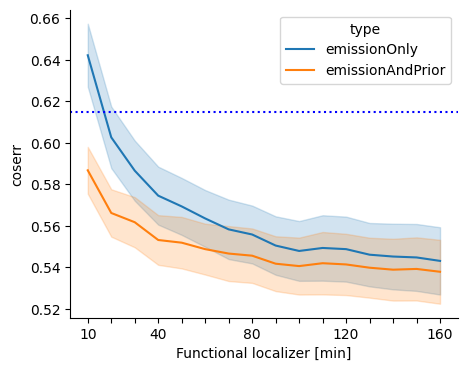

In [11]:
ig.plot_eval('indivgroup_coserr_hard_NettekovenSym32.tsv', var='coserr')
plt.savefig(ut.figure_dir + 'individgroup_coserr_hard_NettekovenSym32.pdf',bbox_inches='tight')

In [11]:
Dcos = pd.read_csv(ut.model_dir + '/Models/Evaluation_03/indivgroup_coserr_hard_NettekovenSym32.tsv',sep='\t')
# Rename levels of Dcos type
rename = {'emissionOnly':'data', 'emissionAndPrior':'data and group'}
Dcos['type'] = Dcos['type'].replace(rename)

Cos = pd.pivot_table(Dcos[(Dcos.runs==0) | (Dcos.runs==3)],index='subject',columns='type',values='coserr')
tres = ss.ttest_rel(Cos['data'],Cos['group'])
print(f'30 min data vs. group t(23)={tres.statistic:.3f}, p = {tres.pvalue:.4f}')

Cos = pd.pivot_table(Dcos[(Dcos.runs==0) | (Dcos.runs==4)],index='subject',columns='type',values='coserr')
tres = ss.ttest_rel(Cos['data'],Cos['group'])
print(f'40 min data vs. group t(23)={tres.statistic:.3f}, p = {tres.pvalue:.4f}')

30 min data vs. group t(23)=-1.934, p = 0.0655
40 min data vs. group t(23)=-2.869, p = 0.0087


In [14]:
# 20 min combined vs. data / group
Cos = pd.pivot_table(Dcos[(Dcos.runs==0) | (Dcos.runs==2)],index='subject',columns='type',values='coserr')
tres = ss.ttest_rel(Cos['data and group'],Cos['data'])
print(f'20 min combined vs. data t(23)={tres.statistic:.3f}, p = {tres.pvalue}')
tres = ss.ttest_rel(Cos['data and group'],Cos['group'])
print(f'20 min combined vs. group t(23)={tres.statistic:.3f}, p = {tres.pvalue:.4f}')


20 min combined vs. data t(23)=-9.098, p = 4.41408339070074e-09
20 min combined vs. group t(23)=-4.241, p = 0.0003


In [54]:
# 160 min combined vs. data / group (note combined vs. group not quite significant for 10min)
Cos = pd.pivot_table(Dcos[(Dcos.runs==0) | (Dcos.runs==16)],index='subject',columns='type',values='coserr')
tres = ss.ttest_rel(Cos['data and group'],Cos['data'])
print(f'160 min combined vs. data t(23)={tres.statistic:.3f}, p = {tres.pvalue}')

160 min combined vs. data t(23)=-3.798, p = 0.0009288483018179889


## Appendix: Individual group for other parcellations

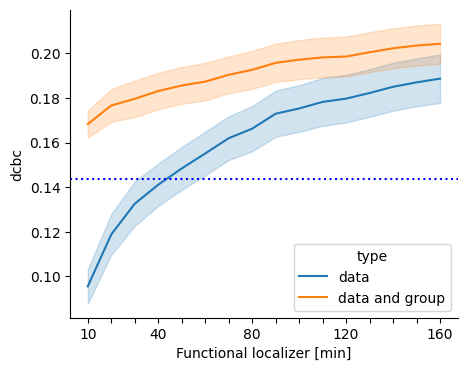

In [12]:
ig.plot_eval('indivgroup_asym_Md_K17.tsv')
# t.ylim([0.21,0.3])


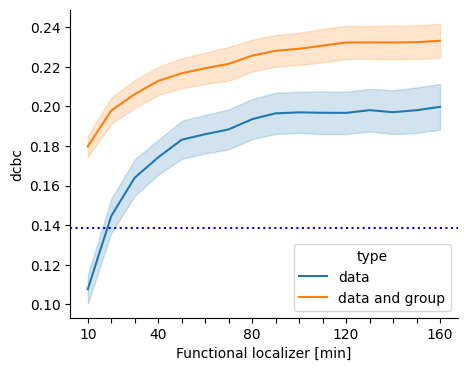

In [13]:
ig.plot_eval('indivgroup_asym_Md_K68.tsv')

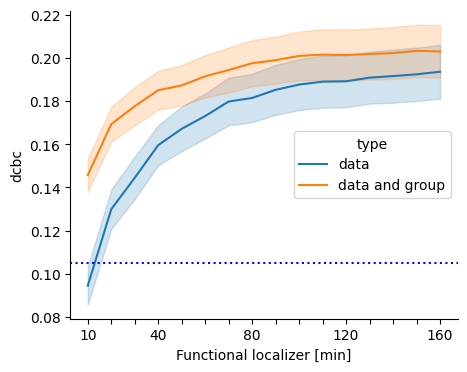

In [14]:
ig.plot_eval('indivgroup_asym_MdPoNiIbWmDeSo_K68.tsv')

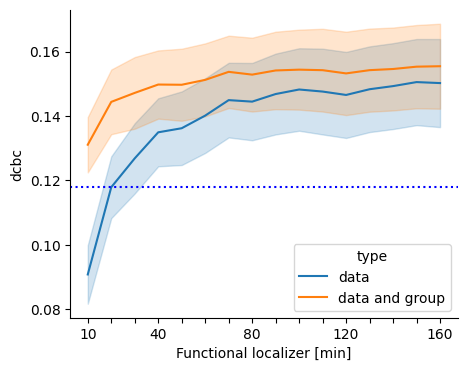

In [15]:
ig.plot_eval('indivgroup_sym_MdPoNiIbWmDeSo_K68.tsv',normalize=True)